In [4]:
import pandas as pd

df = pd.read_csv("../data/M2SL(1).csv")
df["observation_date"] = pd.to_datetime(df["observation_date"])
df.head()


,observation_date,M2SL
0,2014-09-01,11503.7
1,2014-10-01,11577.5
2,2014-11-01,11618.2
3,2014-12-01,11701.9
4,2015-01-01,11788.8


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df["observation_date"] = pd.to_datetime(df["observation_date"])

base_date = pd.to_datetime("1959-01-01")
df["days_since_1959"] = (df["observation_date"] - base_date).dt.days
df = df[df["days_since_1959"] > 0]
df["log_days"] = np.log10(df["days_since_1959"])
df["log_m2"] = np.log10(df["M2SL"])

X = df[["log_days"]]
y = df["log_m2"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Slope (β1): {slope:.4f}")
print(f"Intercept (β0): {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")


Slope (β1): 4.2767
Intercept (β0): -14.3743
R-squared: 0.9240


The power-law model for M2 USD monetary expansion:

$$
\text{M2} = 10^{-14.3743} \cdot \text{Days}^{4.2767}
$$


In [7]:
import statsmodels.api as sm
import numpy as np

# Extract x and y
X = df['log_days']
y = df['log_m2']

# Add constant for intercept
X = sm.add_constant(X)  # Adds intercept term β0

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print summary for full statistical analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 log_m2   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1543.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           6.54e-73
Time:                        11:59:02   Log-Likelihood:                 282.14
No. Observations:                 129   AIC:                            -560.3
Df Residuals:                     127   BIC:                            -554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3743      0.473    -30.369      0.0

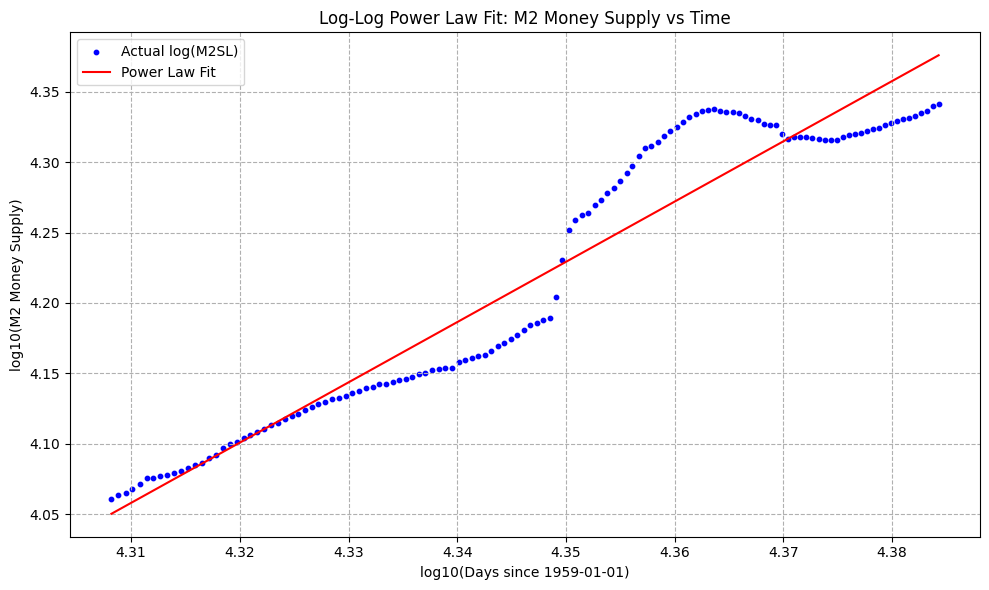

In [9]:
# Predict fitted values
df["log_m2_pred"] = model.predict(X)
df["m2_pred"] = 10**df["log_m2_pred"]

# Plot log-log relationship
plt.figure(figsize=(10, 6))

# Actual log M2SL values
plt.scatter(df["log_days"], df["log_m2"], s=10, label="Actual log(M2SL)", color='blue')

# Fitted line (predicted log M2SL)
plt.plot(df["log_days"], df["log_m2_pred"], color='red', label="Power Law Fit")

# Labels and grid
plt.xlabel("log10(Days since 1959-01-01)")
plt.ylabel("log10(M2 Money Supply)")
plt.title("Log-Log Power Law Fit: M2 Money Supply vs Time")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()



In [11]:
df["purchasing_power"] = np.log10(1 / df["M2SL"])*-1
df.head()

,observation_date,M2SL,days_since_1959,log_days,log_m2,log_m2_pred,m2_pred,purchasing_power
0,2014-09-01,11503.7,20332,4.308180,4.060838,4.050323,11228.520362,4.060838
1,2014-10-01,11577.5,20362,4.308820,4.063615,4.053061,11299.546423,4.063615
2,2014-11-01,11618.2,20393,4.309481,4.065139,4.055887,11373.301125,4.065139
3,2014-12-01,11701.9,20423,4.310120,4.068256,4.058617,11445.027286,4.068256
4,2015-01-01,11788.8,20454,4.310778,4.071470,4.061434,11519.507891,4.071470


In [12]:
df["purchasing_power_percent"] = (df["purchasing_power"].iloc[0]/df["purchasing_power"]) * 100
df.head()

,observation_date,M2SL,days_since_1959,log_days,log_m2,log_m2_pred,m2_pred,purchasing_power,purchasing_power_percent
0,2014-09-01,11503.7,20332,4.308180,4.060838,4.050323,11228.520362,4.060838,100.000000
1,2014-10-01,11577.5,20362,4.308820,4.063615,4.053061,11299.546423,4.063615,99.931656
2,2014-11-01,11618.2,20393,4.309481,4.065139,4.055887,11373.301125,4.065139,99.894191
3,2014-12-01,11701.9,20423,4.310120,4.068256,4.058617,11445.027286,4.068256,99.817641
4,2015-01-01,11788.8,20454,4.310778,4.071470,4.061434,11519.507891,4.071470,99.738865


In [13]:
df.tail()

,observation_date,M2SL,days_since_1959,log_days,log_m2,log_m2_pred,m2_pred,purchasing_power,purchasing_power_percent
124,2025-01-01,21519.8,24107,4.382143,4.332838,4.366637,23261.467430,4.332838,93.722344
125,2025-02-01,21613.5,24138,4.382701,4.334725,4.369024,23389.663533,4.334725,93.681547
126,2025-03-01,21706.4,24166,4.383205,4.336588,4.371177,23505.918179,4.336588,93.641308
127,2025-04-01,21862.4,24197,4.383762,4.339698,4.373558,23635.144535,4.339698,93.574200
128,2025-05-01,21942.0,24227,4.384300,4.341276,4.375860,23760.719879,4.341276,93.540179


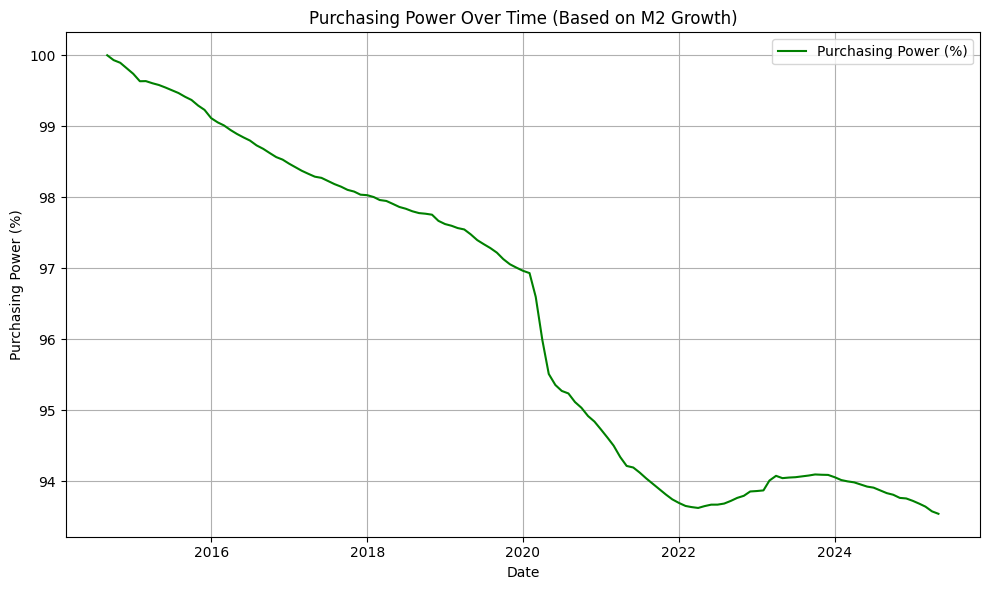

In [14]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['purchasing_power_percent'], label='Purchasing Power (%)', color='green')

# Labels and formatting
plt.xlabel("Date")
plt.ylabel("Purchasing Power (%)")
plt.title("Purchasing Power Over Time (Based on M2 Growth)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


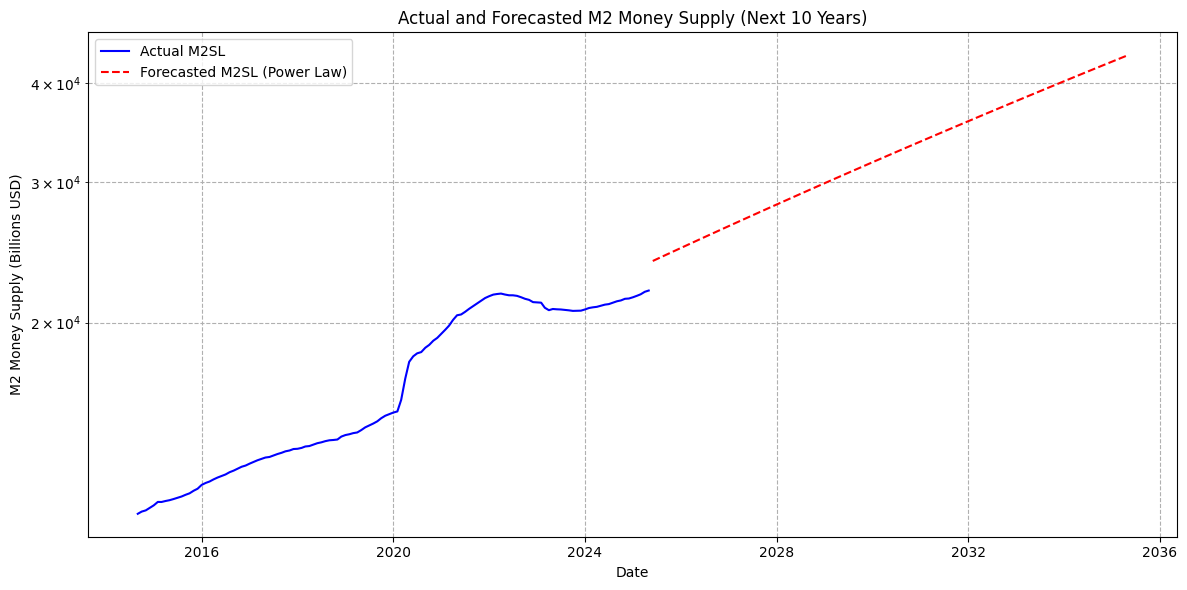

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your power-law model coefficients
slope = 4.2767
intercept = -14.3743

# Define time range
last_date = df['observation_date'].max()
start_days = df['days_since_1959'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')  # next 10 years monthly

# Calculate days since 1959-01-01 for forecast
ref_date = pd.to_datetime('1959-01-01')
future_days = (future_dates - ref_date).days

# Compute log_days and predicted M2
log_days = np.log10(future_days)
log_m2_pred = intercept + slope * log_days
m2_pred = 10**log_m2_pred

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'observation_date': future_dates,
    'days_since_1959': future_days,
    'log_days': log_days,
    'log_m2_pred': log_m2_pred,
    'M2_pred': m2_pred
})

# Plot actual and forecasted M2
plt.figure(figsize=(12, 6))

# Actual
plt.plot(df['observation_date'], df['M2SL'], label='Actual M2SL', color='blue')

# Forecasted
plt.plot(forecast_df['observation_date'], forecast_df['M2_pred'], label='Forecasted M2SL (Power Law)', color='red', linestyle='--')

plt.xlabel("Date")
plt.ylabel("M2 Money Supply (Billions USD)")
plt.title("Actual and Forecasted M2 Money Supply (Next 10 Years)")
plt.yscale('log')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()


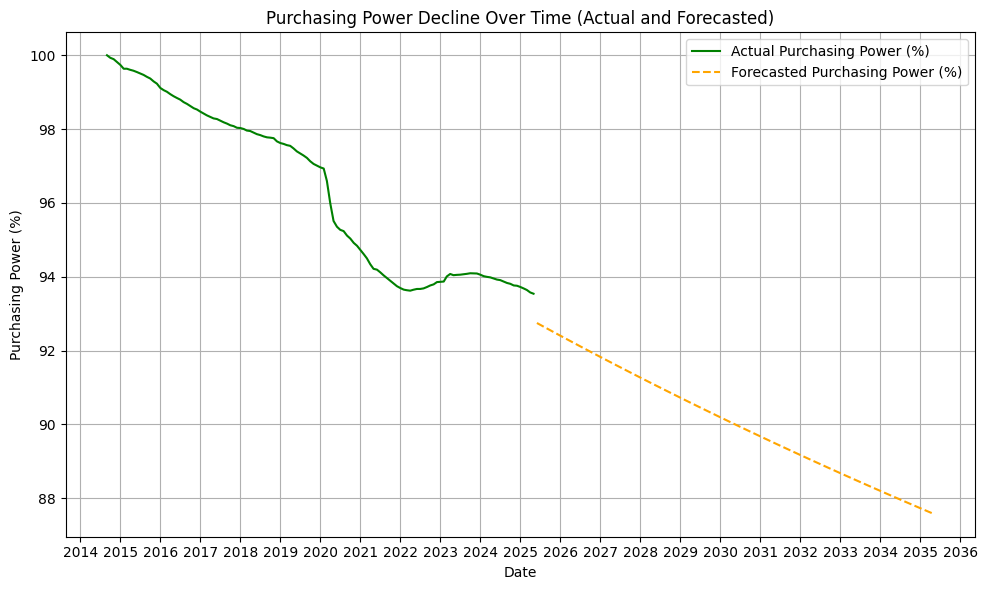

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate purchasing power on forecast data
forecast_df["purchasing_power"] = np.log10(1 / forecast_df["M2_pred"]) * -1  # same as log10(M2_pred)
baseline_power = df["purchasing_power"].iloc[0]  # baseline from start of actual data
forecast_df["purchasing_power_percent"] = (baseline_power / forecast_df["purchasing_power"]) * 100

# Plot actual + forecasted purchasing power
plt.figure(figsize=(10, 6))

# Actual data
plt.plot(df['observation_date'], df['purchasing_power_percent'], label='Actual Purchasing Power (%)', color='green')

# Forecast data
plt.plot(forecast_df['observation_date'], forecast_df['purchasing_power_percent'], 
         label='Forecasted Purchasing Power (%)', color='orange', linestyle='--')

# Format x-axis with 1-year intervals
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # every 1 year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as 'YYYY'

# Labels and formatting
plt.xlabel("Date")
plt.ylabel("Purchasing Power (%)")
plt.title("Purchasing Power Decline Over Time (Actual and Forecasted)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
